In [2]:
import pandas as pd 
data = pd.read_csv('CC GENERAL.csv')
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [45]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
x=data.drop(["CUST_ID"], axis=1)


In [46]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(x)
data_scaled = pd.DataFrame(data_scaled, columns=x.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.208886,0.000080,0.187872,0.187872,0.00000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939987,0.000000,0.039147,0.00000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [7]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

clust_labels=model.fit_predict(x)  

In [8]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


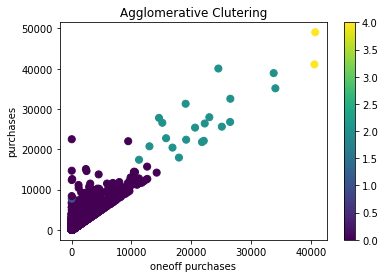

In [10]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (x["ONEOFF_PURCHASES"], x["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("oneoff purchases")
ax.set_ylabel("purchases")
plt.colorbar(scatter)

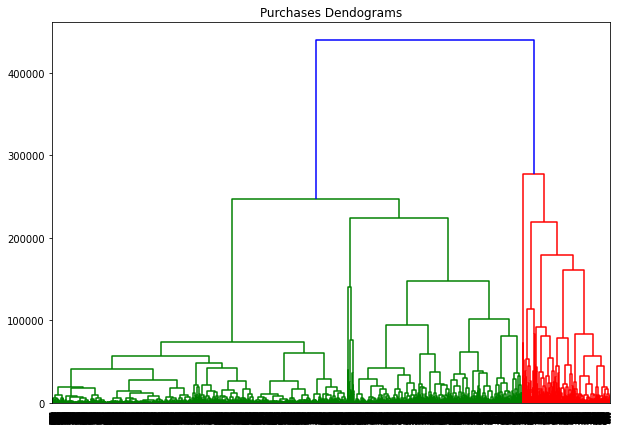

In [44]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Purchases Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [43]:
from sklearn.cluster import KMeans    
kmeans = KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [42]:
label=pd.DataFrame(kmeans.labels_)
label

,0
0,0
1,0
2,8
3,3
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [48]:
x["label"]=label[0]

In [49]:
wcss = [] 
K=range(1, 11)
for k in K: 
    km = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    km.fit(x) 
    wcss.append(km.inertia_)

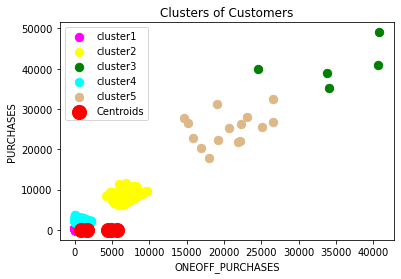

In [52]:
plt.scatter(x["ONEOFF_PURCHASES"][x.label == 0], x["PURCHASES"][x.label == 0],s=70,c='magenta',label='cluster1')
plt.scatter(x["ONEOFF_PURCHASES"][x.label == 1], x["PURCHASES"][x.label == 1],s=70,c='yellow',label='cluster2')
plt.scatter(x["ONEOFF_PURCHASES"][x.label == 2], x["PURCHASES"][x.label == 2],s=70,c='green',label='cluster3')
plt.scatter(x["ONEOFF_PURCHASES"][x.label == 3], x["PURCHASES"][x.label == 3],s=70,c='cyan',label='cluster4')
plt.scatter(x["ONEOFF_PURCHASES"][x.label == 4], x["PURCHASES"][x.label == 4],s=70,c='burlywood',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

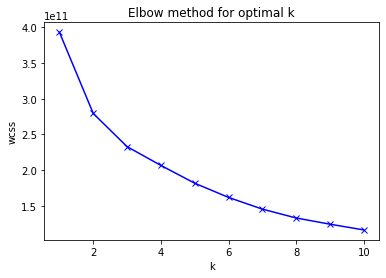

In [39]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow method for optimal k')
plt.show()

>From the observation of the kmeans clustering and the hierarchical clustering; kmeans clustering give us a clearer observation